In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Proyek Analisis Data: Bike Sharing Dataset

Nama: Riky Raharjo
Kelas: Dicoding - Analisis Data dengan Python  
Tanggal: 18 Jun 2025

## Latar Belakang

Bike sharing adalah sistem penyewaan sepeda modern yang memungkinkan pengguna menyewa dan mengembalikan sepeda secara otomatis. Sistem ini berkembang pesat karena mendukung mobilitas kota yang ramah lingkungan, sehat, dan efisien.

Dataset Bike Sharing ini mencatat data penyewaan sepeda di Washington D.C. selama tahun 2011 dan 2012, termasuk faktor cuaca, musim, hari kerja/libur, dan jumlah penyewaan oleh pengguna kasual maupun terdaftar.

Melalui analisis dataset ini, kita dapat memahami pola penggunaan sepeda berdasarkan musim, hari, dan cuaca, yang sangat berguna untuk pengambilan keputusan operasional dan perencanaan armada.

## Pertanyaan Bisnis

1. **Kapan waktu tersibuk penyewaan sepeda dalam setahun? Musim apa yang paling banyak digunakan?**
2. **Bagaimana pengaruh suhu dan cuaca terhadap jumlah penyewaan sepeda?**

In [2]:
# 1. IMPORT LIBRARY
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 2. LOAD DATASET
path = '/content/drive/MyDrive/DICODING COURSE/Analisis Data dengan Pyhton/Project Akhir/day.csv'
df = pd.read_csv(path)

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Eksplorasi Awal Dataset

Melihat struktur dan informasi umum dari dataset untuk memahami kolom dan nilainya.

In [3]:
# Cek struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
# Statistik ringkasan
df.describe()

# Cek missing value
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


## Prapemrosesan Data

Beberapa transformasi dilakukan agar data lebih mudah dianalisis, seperti:
- Mengubah format tanggal
- Menambahkan label musim
- Menambahkan label hari
- Mengganti kode tahun jadi tahun asli

In [5]:
# Ubah kolom dteday ke datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Label musim
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season_label'] = df['season'].map(season_dict)

# Label hari
weekday_dict = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
df['weekday_label'] = df['weekday'].map(weekday_dict)

# Tahun aktual
df['year'] = df['yr'].map({0: 2011, 1: 2012})

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label,weekday_label,year
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Spring,Saturday,2011
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Spring,Sunday,2011
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Spring,Monday,2011
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Spring,Tuesday,2011
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Spring,Wednesday,2011


<ipython-input-8-3898590532>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='season_label', y='cnt', estimator=sum, palette='Set2')


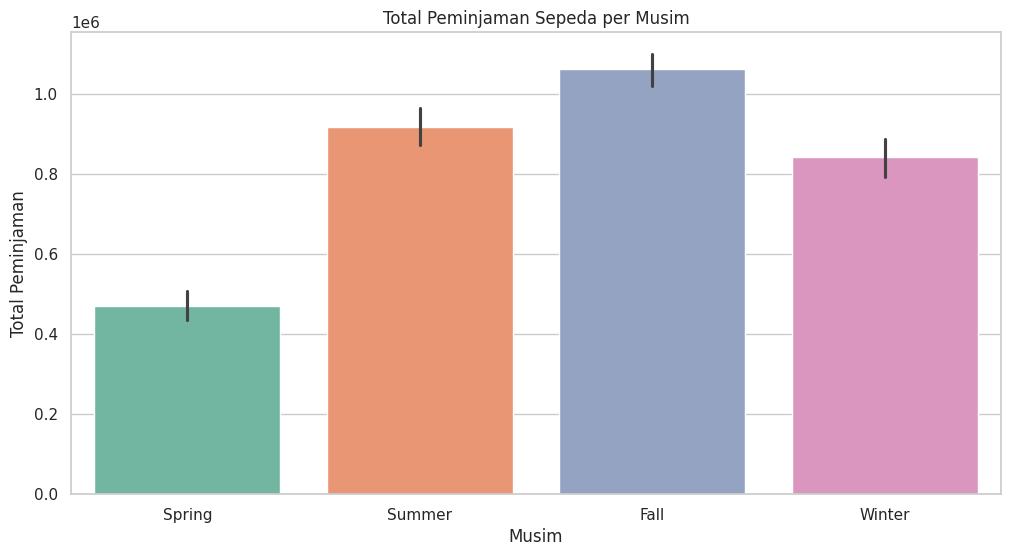

In [8]:
# Visualisasi Jumlah Peminjaman per Musim
sns.barplot(data=df, x='season_label', y='cnt', estimator=sum, palette='Set2')
plt.title('Total Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Total Peminjaman')
plt.show()

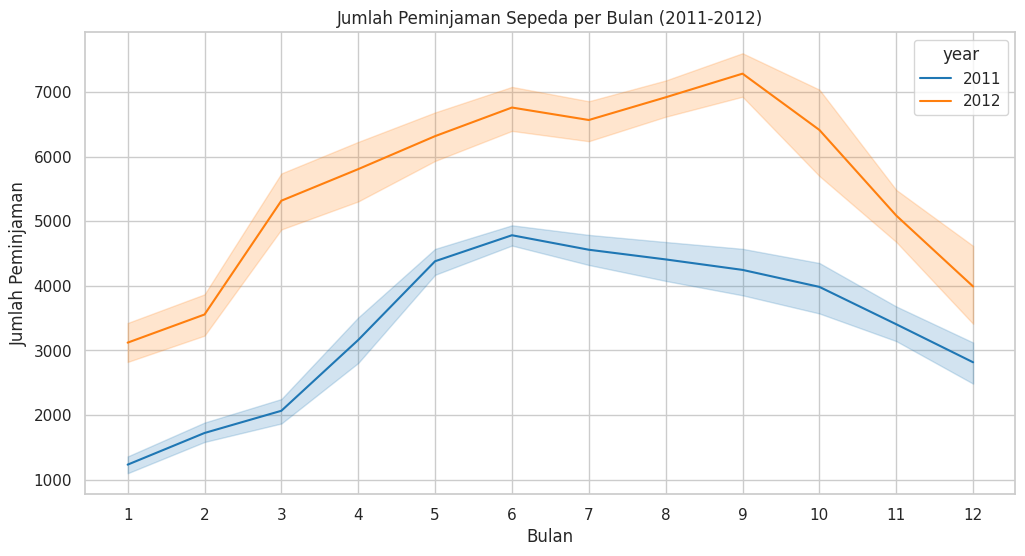

In [9]:
# Visualisasi Jumlah Peminjaman per Musim
sns.lineplot(data=df, x='mnth', y='cnt', hue='year', palette='tab10')
plt.title('Jumlah Peminjaman Sepeda per Bulan (2011-2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(1,13))
plt.show()

## Analisis Pertanyaan 2:
**Bagaimana pengaruh suhu dan cuaca terhadap jumlah penyewaan sepeda?**

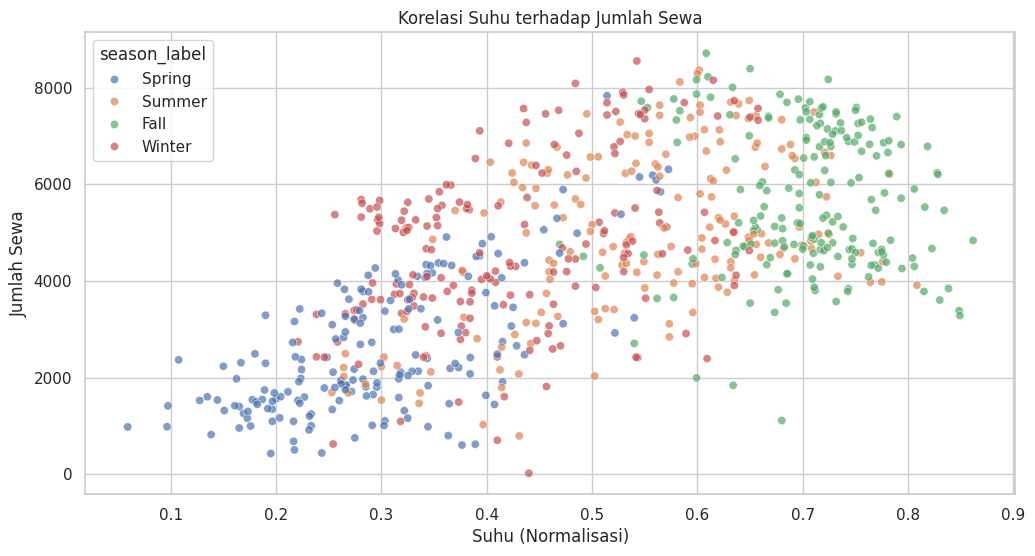

In [10]:
# Korelasi Suhu vs Jumlah Sewa
sns.scatterplot(data=df, x='temp', y='cnt', hue='season_label', alpha=0.7)
plt.title('Korelasi Suhu terhadap Jumlah Sewa')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Sewa')
plt.show()

<ipython-input-11-4051492913>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='weather_label', y='cnt', palette='Set3')


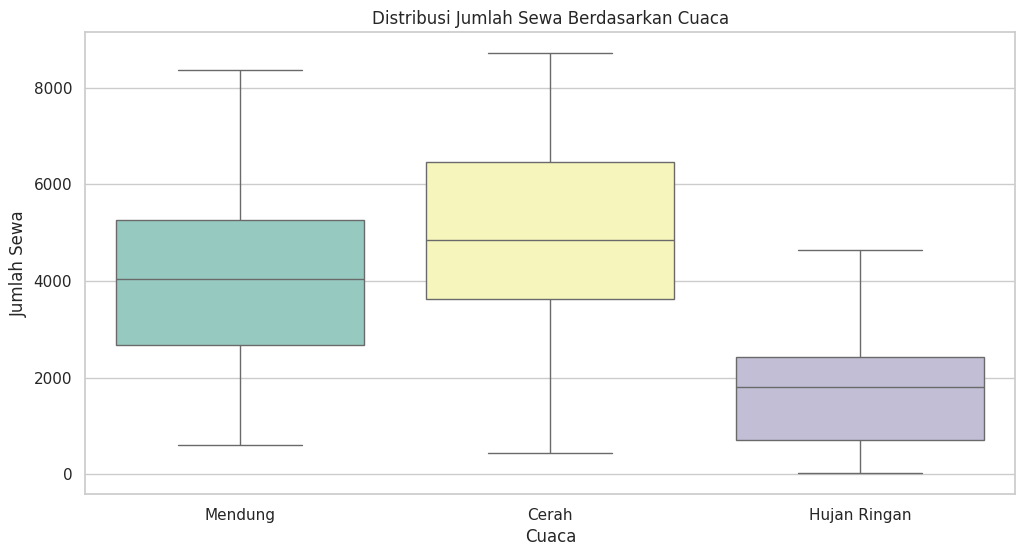

In [11]:
# Visualisasi Jumlah Sewa Berdasarkan Cuaca
weather_label = {
    1: 'Cerah',
    2: 'Mendung',
    3: 'Hujan Ringan',
    4: 'Cuaca Ekstrem'
}
df['weather_label'] = df['weathersit'].map(weather_label)

sns.boxplot(data=df, x='weather_label', y='cnt', palette='Set3')
plt.title('Distribusi Jumlah Sewa Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Sewa')
plt.show()

## Kesimpulan

1. **Peminjaman tertinggi terjadi pada musim Fall dan Summer**, menunjukkan tren penggunaan meningkat saat cuaca mendukung.
2. **Suhu berbanding lurus dengan jumlah penyewaan sepeda**, semakin hangat maka penggunaan sepeda meningkat.
3. **Cuaca buruk mengurangi jumlah peminjaman**, seperti terlihat pada boxplot penyewaan berdasarkan cuaca.

Hasil analisis ini bermanfaat untuk perencanaan operasional sepeda pada musim atau kondisi cuaca tertentu.